In [1]:
import pandas as pd
df = pd.read_csv('improved_disease_dataset.csv')

In [48]:
df.columns

Index(['fever', 'headache', 'nausea', 'vomiting', 'fatigue', 'joint_pain',
       'skin_rash', 'cough', 'weight_loss', 'yellow_eyes', 'disease'],
      dtype='object')

In [13]:
df.isnull().sum()

fever          0
headache       0
nausea         0
vomiting       0
fatigue        0
joint_pain     0
skin_rash      0
cough          0
weight_loss    0
yellow_eyes    0
disease        0
dtype: int64

In [15]:
from sklearn.preprocessing import LabelEncoder


encoder = LabelEncoder()
df['disease'] = encoder.fit_transform(df['disease'])

In [16]:
df['disease']

0       29
1       29
2       29
3       29
4       29
        ..
1995     2
1996     2
1997     2
1998     2
1999     2
Name: disease, Length: 2000, dtype: int32

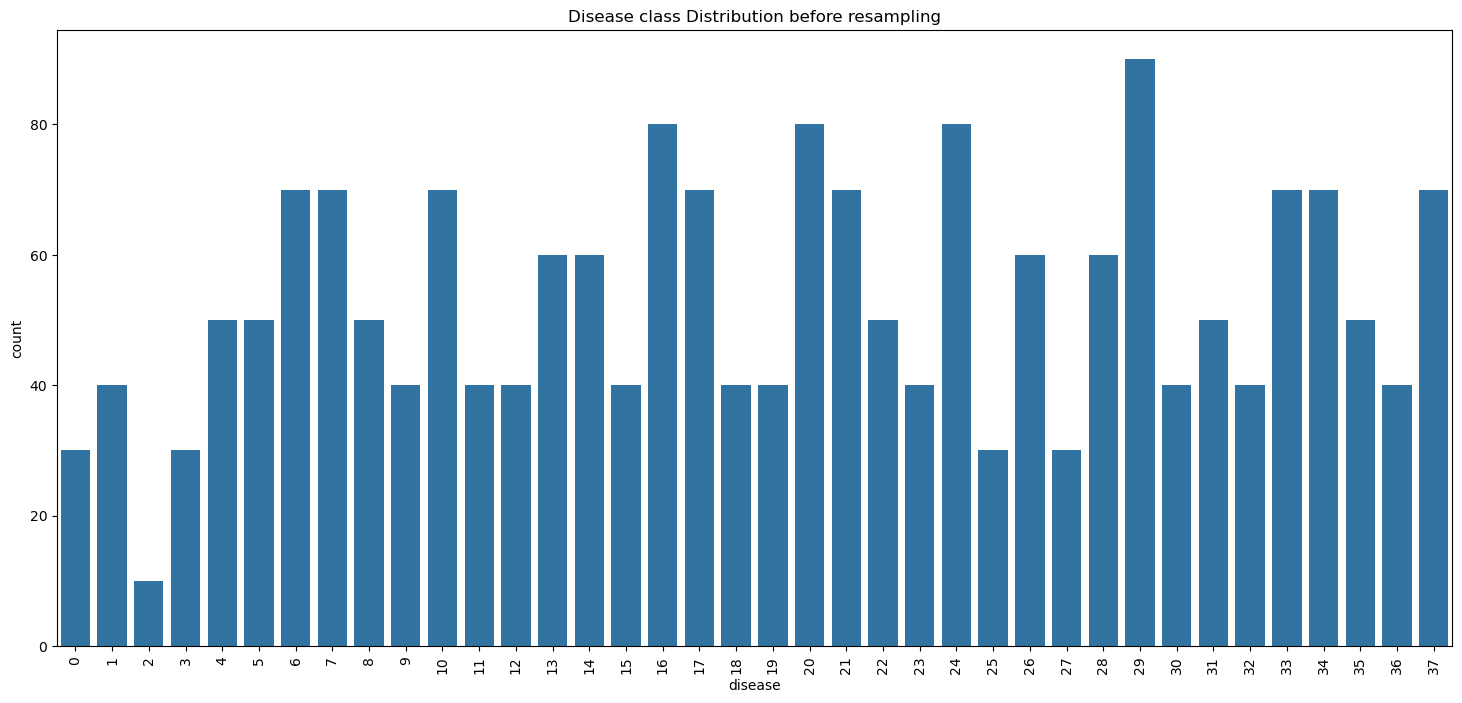

,fever,headache,nausea,vomiting,fatigue,joint_pain,skin_rash,cough,weight_loss,yellow_eyes
0,1,0,1,0,1,0,0,1,1,0
1,0,0,1,0,0,0,1,1,0,0
2,0,0,1,0,1,0,1,1,0,0
3,0,0,1,1,1,0,1,1,1,1
4,1,0,1,0,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...
3415,0,0,1,1,0,0,0,0,0,1
3416,0,0,0,1,0,1,0,0,0,1
3417,0,0,0,1,0,1,0,0,0,1
3418,0,0,0,0,0,1,1,0,0,0


In [34]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

plt.figure(figsize=(18,8))
sns.countplot(x=y)
plt.title("Disease class Distribution before resampling")
plt.xticks(rotation=90)
plt.show()


# Here we're using the random over sampler 
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)
X_resampled


In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'),
    "LightGBM": LGBMClassifier()
}


In [32]:
X_resampled.isna().sum()

fever          0
headache       0
nausea         0
vomiting       0
fatigue        0
joint_pain     0
skin_rash      0
cough          0
weight_loss    0
yellow_eyes    0
dtype: int64

In [45]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scoring = 'roc_auc_ovr'

for model_name, model in models.items():
    try:
        scores = cross_val_score(
            model,
            X_resampled,
            y_resampled,
            cv=stratified_kfold,
            scoring=cv_scoring,
            n_jobs=-1,
            error_score='raise' 
        )
        print("=" * 50)
        print(f"Model: {model_name}")
        print(f"Scores: {scores}")
        print(f"Mean Accuracy: {scores.mean():.4f}")
    except Exception as e:
        print("=" * 50)
        print(f"Model: {model_name} failed with error:")
        print(e)


Model: Logistic Regression
Scores: [0.93533226 0.93263439 0.93253341 0.92811891 0.93395808]
Mean Accuracy: 0.9325
Model: K-Nearest Neighbors
Scores: [0.87771763 0.87243164 0.863528   0.8571093  0.87402863]
Mean Accuracy: 0.8690
Model: Naive Bayes
Scores: [0.81114009 0.8111346  0.80263816 0.81093813 0.82581265]
Mean Accuracy: 0.8123
Model: Gradient Boosting
Scores: [0.94507666 0.94959433 0.94119997 0.93169266 0.94798307]
Mean Accuracy: 0.9431
Model: AdaBoost
Scores: [0.90921843 0.90264826 0.9060003  0.9015375  0.90318608]
Mean Accuracy: 0.9045
Model: XGBoost
Scores: [0.94458494 0.94790843 0.93851307 0.93903333 0.94808844]
Mean Accuracy: 0.9436
Model: LightGBM
Scores: [0.94775258 0.94960531 0.94347198 0.94325466 0.95015849]
Mean Accuracy: 0.9468


In [46]:
import joblib

model = LGBMClassifier()
model.fit(X_resampled, y_resampled)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000294 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 20
[LightGBM] [Info] Number of data points in the train set: 3420, number of used features: 10
[LightGBM] [Info] Start training from score -3.637586
[LightGBM] [Info] Start training from score -3.637586
[LightGBM] [Info] Start training from score -3.637586
[LightGBM] [Info] Start training from score -3.637586
[LightGBM] [Info] Start training from score -3.637586
[LightGBM] [Info] Start training from score -3.637586
[LightGBM] [Info] Start training from score -3.637586
[LightGBM] [Info] Start training from score -3.637586
[LightGBM] [Info] Start training from score -3.637586
[LightGBM] [Info] Start training from score -3.637586
[LightGBM] [Info] Start training from score -3.637586
[LightGBM] [Info] Start training from score -3.637586
[LightGBM] [Info] Start training from score -3.637586
[LightGBM] [

LGBMClassifier()

In [53]:
joblib.dump(model, '../services/diagnosis_model.pkl')

['../services/diagnosis_model.pkl']

In [51]:
import joblib
model = joblib.load('diagnosis_model.pkl')